# Question 1 of final assignment

## packages needed:

In [4]:
!pip install opencv-python

In [2]:
import pandas as pd
import numpy as np  
import cv2 as cv2
from PIL import Image
import scipy 
import matplotlib.pyplot as plt 
from scipy import interpolate

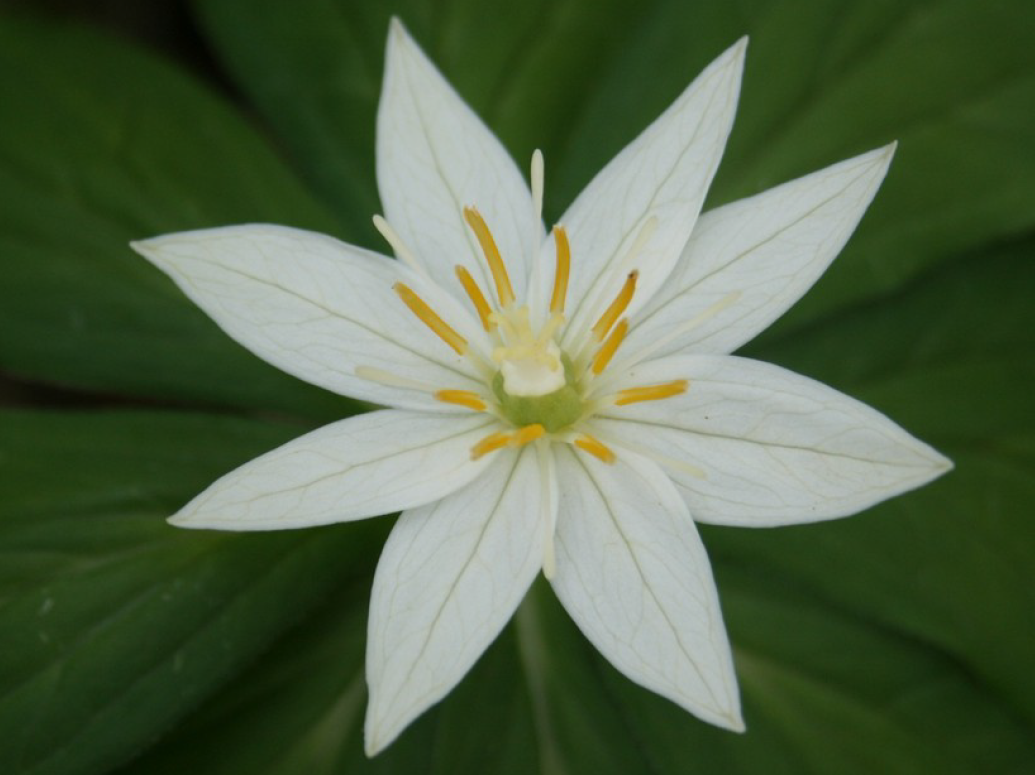

In [10]:
image = Image.open("cap.png") #Here I'm reading the image of the flower from question
image

# Now let us vary the contrast and view how the image transforms

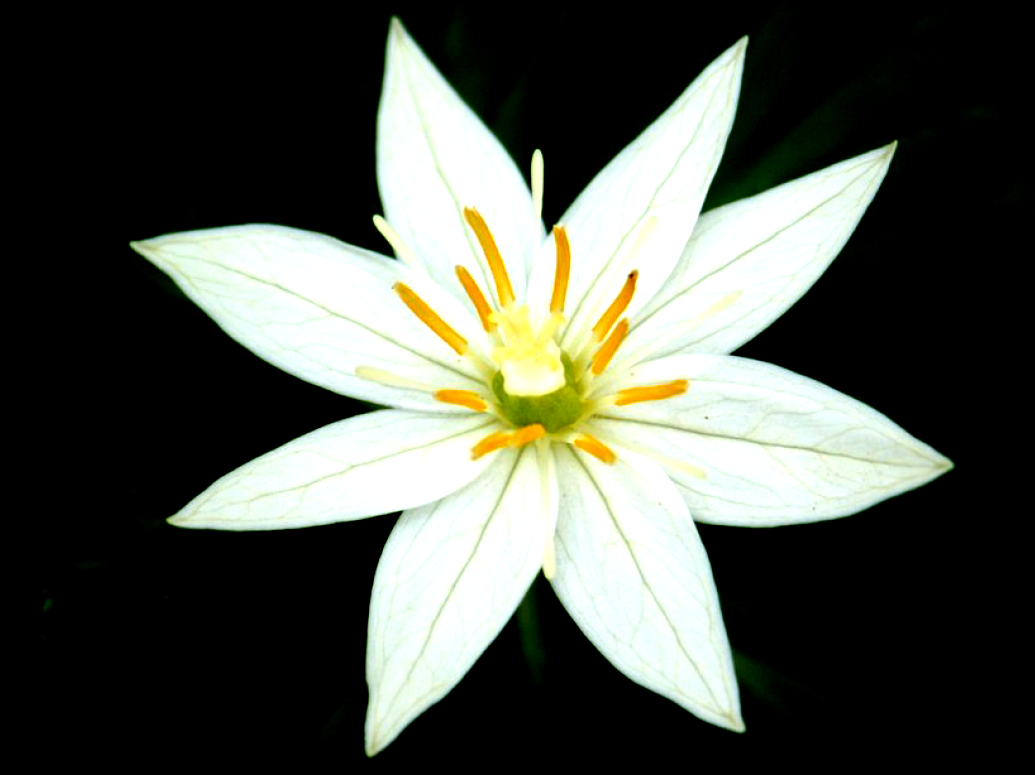

In [7]:
def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 128)
    return img.point(contrast)

change_contrast(Image.open('cap.png'), 100)

# It can be clearly noted that the background becomes darker
# Let us visualize this for different steps:

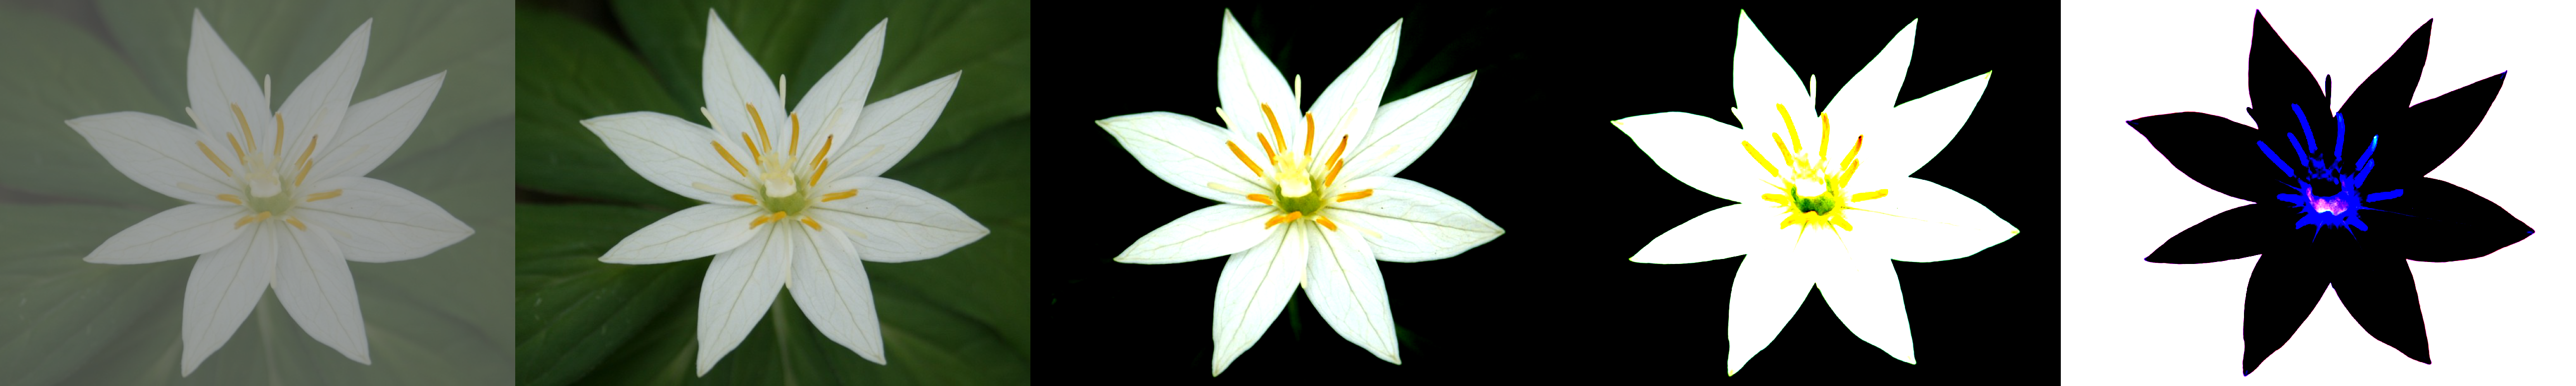

In [6]:
def change_contrast_multi(img, steps):
    width, height = img.size
    canvas = Image.new('RGB', (width * len(steps), height))
    for n, level in enumerate(steps):
        img_filtered = change_contrast(img, level)
        canvas.paste(img_filtered, (width * n, 0))
    return canvas

change_contrast_multi(Image.open('cap.png'), [-100, 0, 100, 200, 300])

# We can choose one of those contrast scales where the edges are more pronounced
# Then scan the array at every continuous 3x3 grid to detect the edges, or we could make use of in-built edge detection here as the edges are clear

In [15]:
img_filtered = change_contrast(Image.open('cap.png'), 200)
img_filtered.save("cap1.png","PNG")

In [20]:
img = cv2.imread('cap1.png',flags=0) 
img_blur = cv2.GaussianBlur(img,(3,3),0,0)
sobelxy = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)

In [27]:
%matplotlib inline

In [32]:
cv2.imwrite("cap2.png",sobelxy)

True

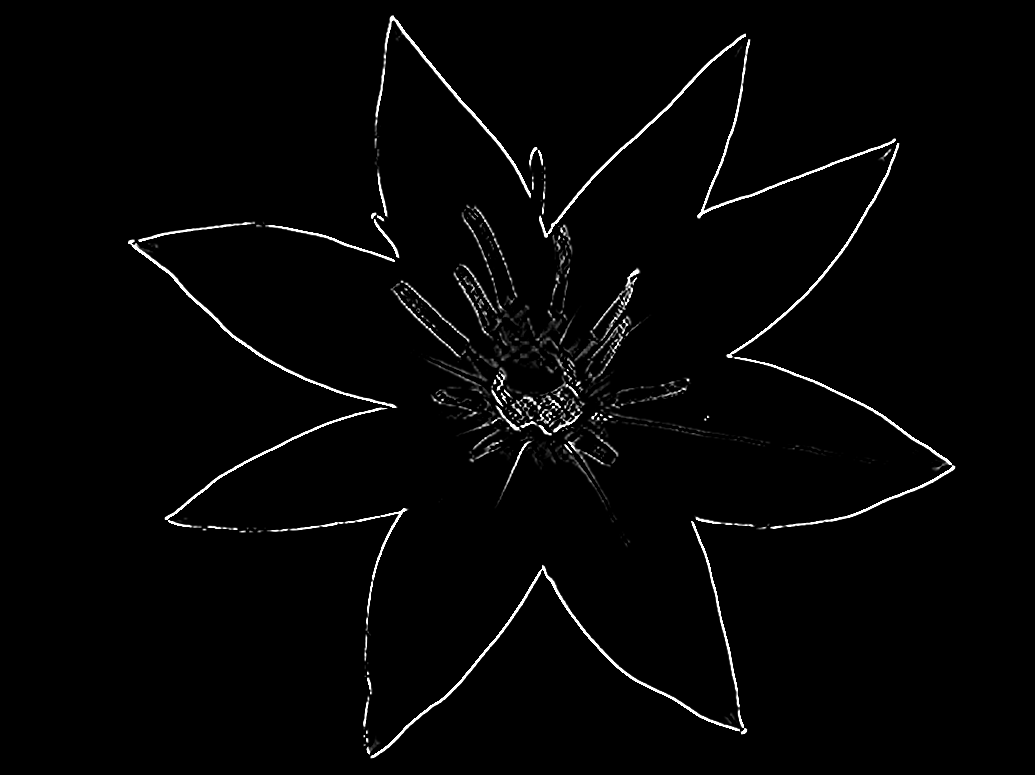

In [33]:
image = Image.open("cap2.png") #Here I'm reading the image of the flower from question
image

# We can see the inner portion being mixed in hence let's choose a threshold, binarize then apply canny
# To make it look like pencil sketch

In [37]:
img.shape

(775, 1035)

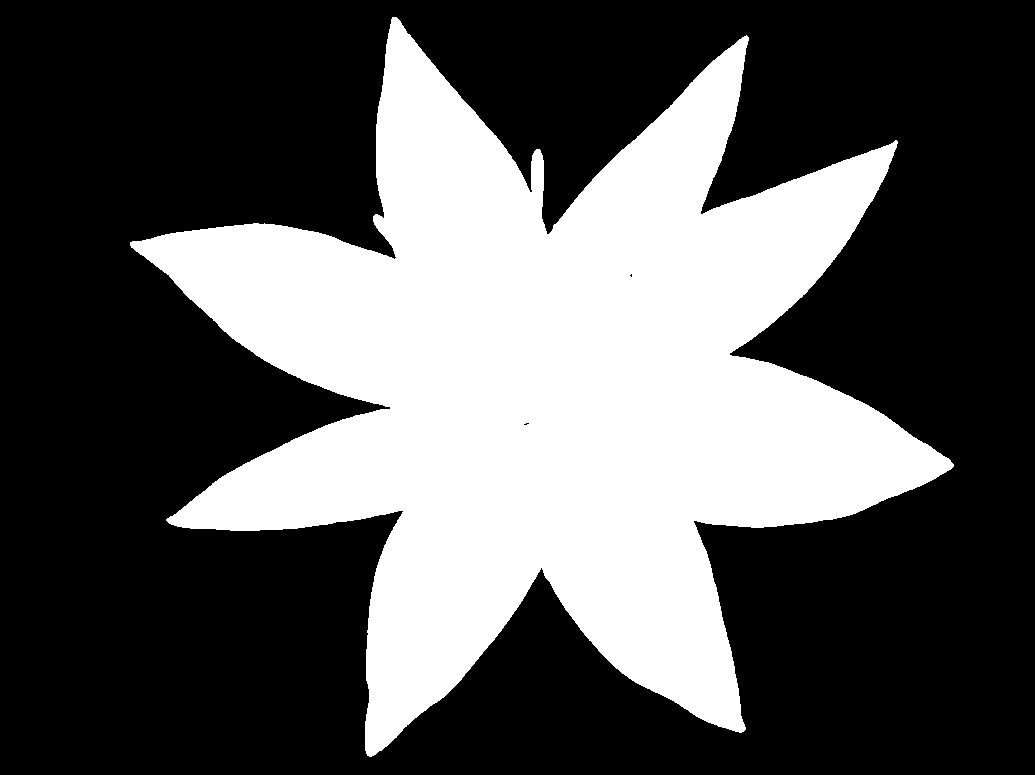

In [53]:
img = cv2.imread('cap1.png',flags=0) 
re, th = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY)
Image.fromarray(th)

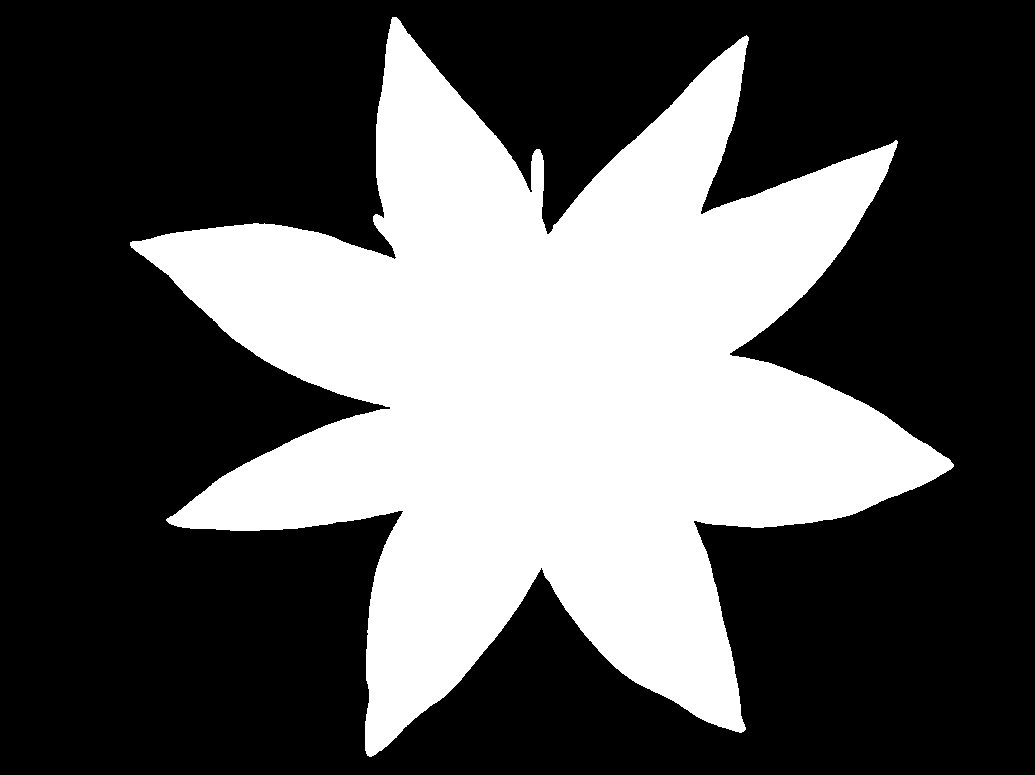

In [61]:
cop = th.copy()
cv2.floodFill(cop,None,(0,0),255)[1]
Image.fromarray(cv2.bitwise_not(cop))
Image.fromarray(th)
OR=th | cv2.bitwise_not(cop)
Image.fromarray(OR)

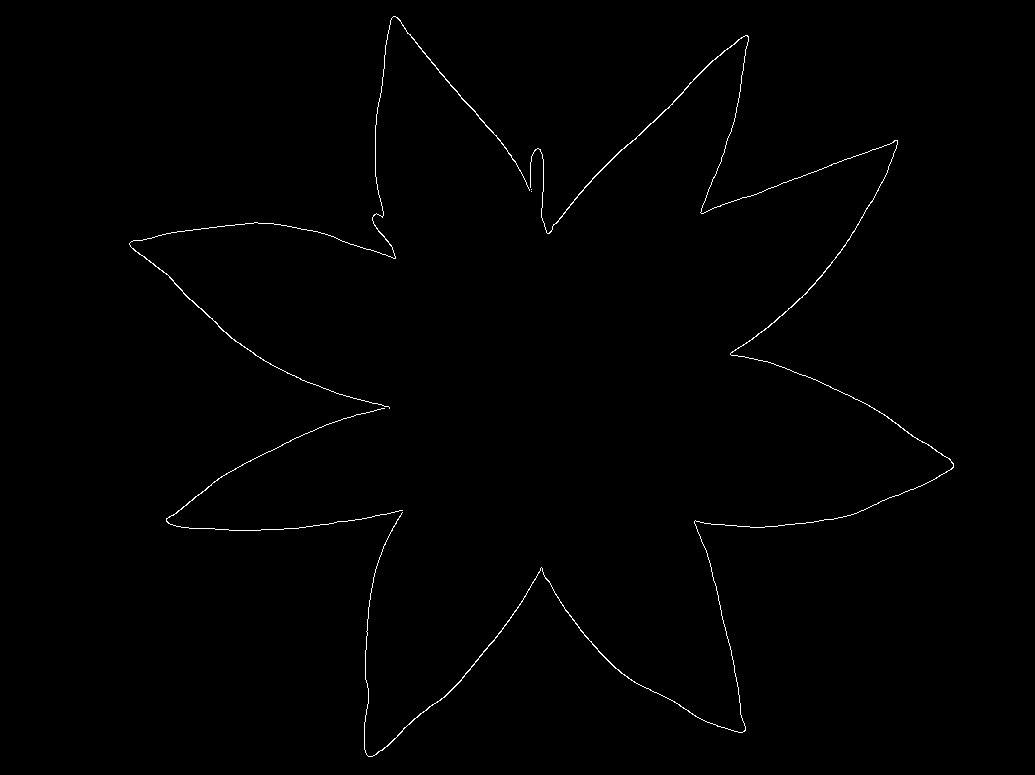

In [63]:
Edges=cv2.Canny(OR,10,255)
Image.fromarray(Edges)

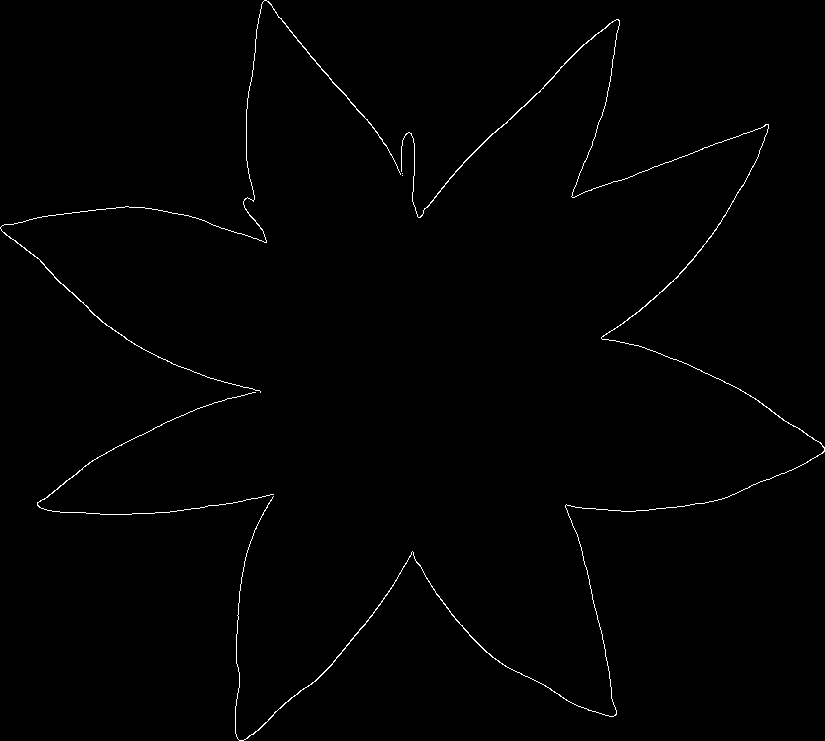

In [68]:
m,n=[i[0] for i in np.transpose(np.nonzero(Edges))],[i[1] for i in np.transpose(np.nonzero(Edges))]
a,b,c,d=min(m),min(n),max(m),max(n)
Final=[]
for j in Edges[a:c+1]:Final.append(j[b:d+1]);
Final=np.array(Final)
Image.fromarray(Final)

# Polar Form:

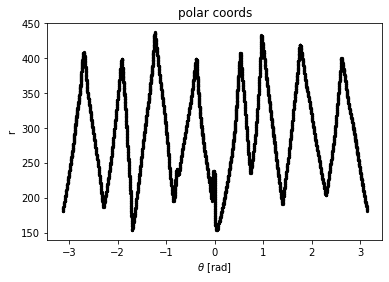

In [150]:
m=np.array([i[0] for i in np.transpose(np.nonzero(Final))])
n=np.array([i[1] for i in np.transpose(np.nonzero(Final))])
m=m*(-1)
n=n-(Final.shape[1]/2)
m=m+(Final.shape[0]/2)
r = np.sqrt(n*n + m*m)
theta = np.arctan2(n, m)
plt.scatter(theta, r,s=5,color="black",label="Original data")
plt.title('polar coords')
plt.xlabel('$\\theta$ [rad]')
plt.ylabel('r')
plt.show()

In [123]:
from scipy import optimize

def test_func(x, a, b, c):
    return a * np.cos(b * x*np.pi/180) + c

params, params_covariance = optimize.curve_fit(test_func,  theta,r,
                                               p0=[300, 8, 300])

print(params)

[-65.8252445    7.90001705 294.31414048]


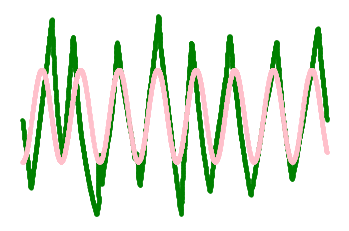

In [126]:
plt.figure(figsize=(6, 4))
plt.scatter(theta, r, label='Original',color="Green",s=10)
plt.scatter(theta, test_func(theta, params[0], params[1], params[2]),
         label='CoS curve',color='Pink',s=10)
plt.axis("off")
plt.show()

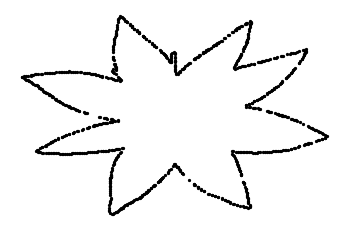

In [127]:
#Original plot
plt.scatter(n[0::5], m[0::5],s=5, color='Black')
plt.axis("off")
plt.show()

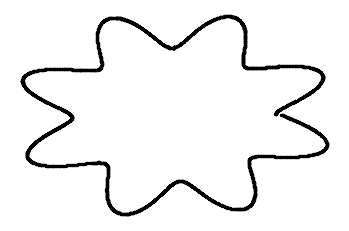

In [143]:
#Reverting the interpolation from Polar coords to X-Y coords
x_out = test_func(theta,params[0], params[1], params[2]) * np.cos(np.radians(theta))
y_out = test_func(theta,params[0], params[1], params[2]) * np.sin(np.radians(theta))

#Original set of points
plt.scatter(x_out, y_out,s=5,color='Black')
plt.axis("off")
plt.show()

In [146]:
print("Final parameters:",params)

Final parameters: [-65.8252445    7.90001705 294.31414048]


In [147]:
#To store this as compression we only require the size to store 3 float values as float size is 4 bytes
Original_file=1287082 #in bytes
Storage=4*3 
Compression=Original_file/Storage
print("Compression ratio:",Compression)

Compression ratio: 107256.83333333333


In [149]:
#Tho the curve isn't exact as the flower, it well resembles it and from this curve it is easy to tell the fold of symmetry:
#It is approximately the value of B in A(cos(Bx))+C which is the curve we fitted
Fold_of_symmetry= round(params[1])
print("Fold of symmetry is close to:",Fold_of_symmetry)

Fold of symmetry is close to: 8


# Testing on a different flower:

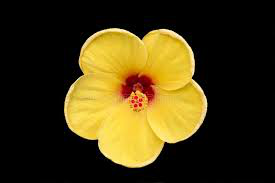

In [159]:
image = Image.open("img3.jpg") #Here I'm reading the image of the flower from question
image

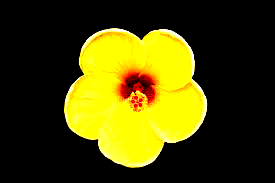

In [160]:
def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 128)
    return img.point(contrast)

change_contrast(Image.open('img3.jpg'), 100)

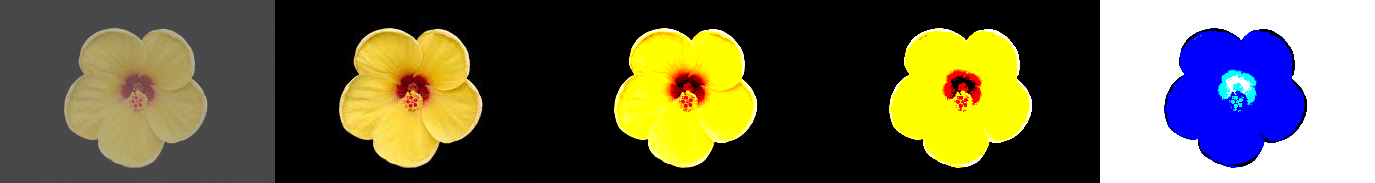

In [158]:
def change_contrast_multi(img, steps):
    width, height = img.size
    canvas = Image.new('RGB', (width * len(steps), height))
    for n, level in enumerate(steps):
        img_filtered = change_contrast(img, level)
        canvas.paste(img_filtered, (width * n, 0))
    return canvas

change_contrast_multi(Image.open('img3.jpg'), [-100, 0, 100, 200, 300])

In [162]:
img_filtered = change_contrast(Image.open('img3.jpg'), 200)
img_filtered.save("img3_1.jpg","JPEG")

In [3]:
img = cv2.imread('img3_1.jpg',flags=0) 
img_blur = cv2.GaussianBlur(img,(3,3),0,0)
sobelxy = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

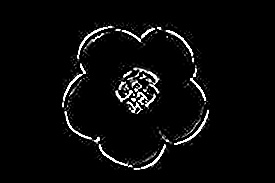

In [4]:
cv2.imwrite("img3_2.jpg",sobelxy)
image = Image.open("img3_2.jpg") #Here I'm reading the image of the flower from question
image

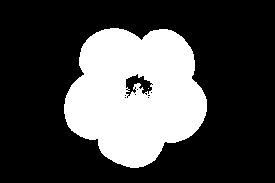

In [8]:
img = cv2.imread('img3_1.jpg',flags=0) 
re, th = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
Image.fromarray(th)

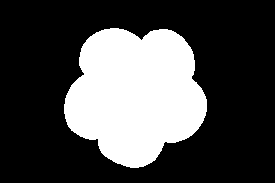

In [9]:
cop = th.copy()
cv2.floodFill(cop,None,(0,0),255)[1]
Image.fromarray(cv2.bitwise_not(cop))
Image.fromarray(th)
OR=th | cv2.bitwise_not(cop)
Image.fromarray(OR)

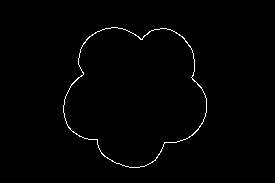

In [10]:
Edges=cv2.Canny(OR,10,255)
Image.fromarray(Edges)

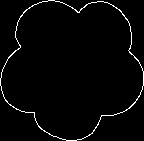

In [11]:
m,n=[i[0] for i in np.transpose(np.nonzero(Edges))],[i[1] for i in np.transpose(np.nonzero(Edges))]
a,b,c,d=min(m),min(n),max(m),max(n)
Final=[]
for j in Edges[a:c+1]:Final.append(j[b:d+1]);
Final=np.array(Final)
Image.fromarray(Final)

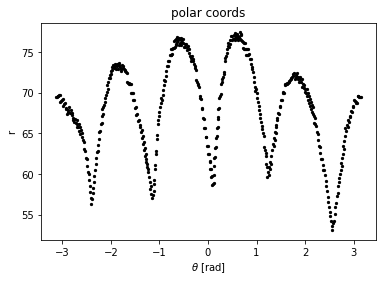

In [12]:
m=np.array([i[0] for i in np.transpose(np.nonzero(Final))])
n=np.array([i[1] for i in np.transpose(np.nonzero(Final))])
m=m*(-1)
n=n-(Final.shape[1]/2)
m=m+(Final.shape[0]/2)
r = np.sqrt(n*n + m*m)
theta = np.arctan2(n, m)
plt.scatter(theta, r,s=5,color="black",label="Original data")
plt.title('polar coords')
plt.xlabel('$\\theta$ [rad]')
plt.ylabel('r')
plt.show()

In [20]:
from scipy import optimize

def test_func(x, a, b, c):
    return a * np.cos(b * x*np.pi/180) + c

params, params_covariance = optimize.curve_fit(test_func,  theta,r,
                                               p0=[10, 25, 65])

print(params)

[ 3.08505905 64.3169627  68.22754742]


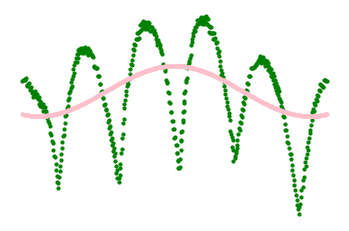

In [21]:
plt.figure(figsize=(6, 4))
plt.scatter(theta, r, label='Original',color="Green",s=10)
plt.scatter(theta, test_func(theta, params[0], params[1], params[2]),
         label='CoS curve',color='Pink',s=10)
plt.axis("off")
plt.show()

C:\Users\chand\nex\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


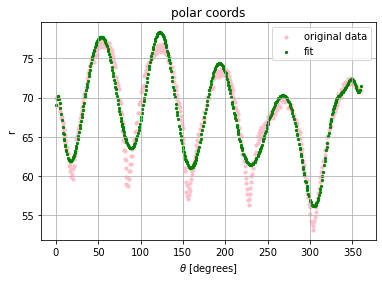

In [31]:
r = np.sqrt(n*n + m*m)
# make sure points are between 0 adn 360[degrees]
theta = np.degrees(np.arctan2(m, n)) % 360
len(theta)
plt.scatter(theta, r,color='pink',s=10)
plt.grid()
plt.title('polar coords')
plt.ylabel('r')
plt.xlabel('$\\theta$ [degrees]')

#Fitting a higher order polynomial
p = np.polyfit(theta, r, 30)

# plot fit
x_fit = np.linspace(90, 360, 270)
y_fit = np.polyval(p, theta)
plt.scatter(theta, y_fit,color='green',s=5)
plt.legend(['original data', 'fit'])
plt.show()

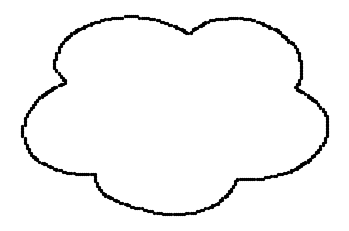

In [32]:
plt.scatter(n[0::1], m[0::1],s=5, color='Black')
plt.axis("off")
plt.show()

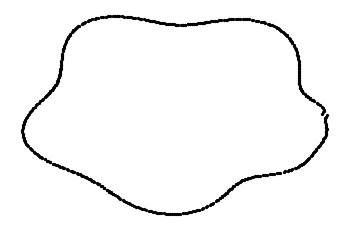

In [33]:
x_out = np.polyval(p, theta) * np.cos(np.radians(theta))
y_out = np.polyval(p, theta) * np.sin(np.radians(theta))

#Original set of points
plt.scatter(x_out, y_out,s=5,color='Black')
plt.axis("off")
plt.show()
